# Homework #2: Decision Trees

In this assignment, you will learn how to develop your own Decision tree models in Python. We will also compare and contrast entropy with the Gini Impurity score.

In this section, please run the provided Python code, add the code needed to complete the tasks described below, and use the results to answer the questions in the HW assignment.

#Part 1: Python Implementation of a Decision Tree.

First implement a decision tree in Python using the sklearn package.

Hint: Go to the following tutorial: https://scikit-learn.org/stable/modules/tree.html

You need to implement something very similar.

Implement the decision tree using the sklearn.tree() function and plot your decision tree.

**Programming Question 1**

Implement a Decision tree using the entropy criterion. Plot the decision tree and also create a confusion matrix for the decision tree.

*Note:* Name your decision tree classifier clf1 for the later graphing visualization stage.

In [2]:
#First let's create the dataset. This dataset will be used for both decision trees

from sklearn.datasets import load_breast_cancer
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report



breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

#splitting the data into train, test values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#Hint: you need y_pred for the confusion matrix which you can find by using the following: y_pred = clf1.predict(X_test)



Add your code here. Comments are for guidance.

[[50  4]
 [ 2 87]]


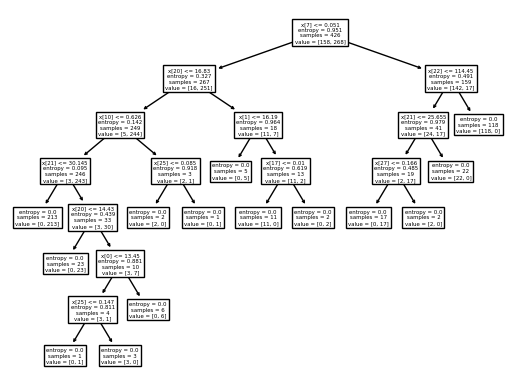

In [3]:
#your code for the entropy decision tree goes here
#See the tutorial for help.
#change criterion to entropy

#create a decision tree classifier using entropy classifier

#plot the decision tree

#generate and print a confusion matrix

#name the classifier clf1 for the later graphing step

# v***** WRITE YOUR CODE HERE *****v #
clf1 = tree.DecisionTreeClassifier(criterion='entropy')
clf1.fit(X_train, y_train)
dtree1 = tree.plot_tree(clf1)

y_pred = clf1.predict(X_test)

print(confusion_matrix(y_test, y_pred))

# ^***** WRITE YOUR CODE HERE *****^ #


In [9]:
tree_depth = clf1.get_depth()
print("Tree depth:", tree_depth)

num_leaf_nodes = clf1.tree_.n_leaves
print("Number of leaf nodes:", num_leaf_nodes)

Tree depth: 7
Number of leaf nodes: 14


**Programming Question 2**

Implement a decision tree using the sklearn package using the 'gini' criterion.
Plot your decision tree, and create a confusion matrix for the decision tree.

*Note:* Name your decision tree classifier clf2 for later graphing and visualization.

[[51  3]
 [ 4 85]]


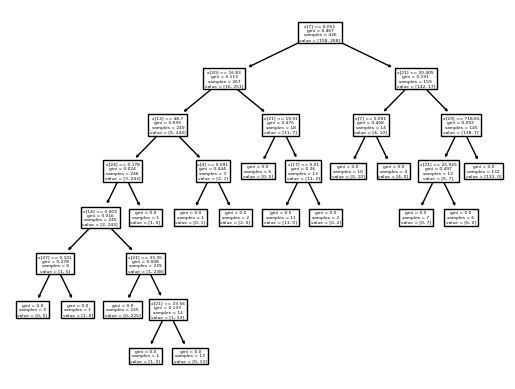

In [10]:
#your code for the gini decision tree goes here
#See the tutorial for help.
#change criterion to gini
#name the classifier clf2 for the later graphing steps


#create a decision tree using the gini criterion
#plot the decison tree
#generate a confusion matrix for the decision tree

# v***** WRITE YOUR CODE HERE *****v #
clf2 = tree.DecisionTreeClassifier(criterion='gini')
clf2.fit(X_train, y_train)
dtree2 = tree.plot_tree(clf2)

y_pred = clf2.predict(X_test)

print(confusion_matrix(y_test, y_pred))

# ^***** WRITE YOUR CODE HERE *****^ #


#Part 2: Plotting Impurity Measures


**Question 3** Plot Impurity Measures. Follow the instructions below.

The following Python code defines functions to calculate different impurity measures commonly used in decision tree algorithms: Gini impurity, entropy, and misclassification error. Then, it generates a plot comparing these measures for different values of the probability parameter p(j=1), which represents the probability of a binary outcome being in class 1. This code essentially demonstrates how different impurity measures behave as the probability of a binary outcome changes.Based on the Lecture, please complete the missing code. Fill in the missing code and answer the questions that follow:



Text(0, 0.5, 'Impurity Index')

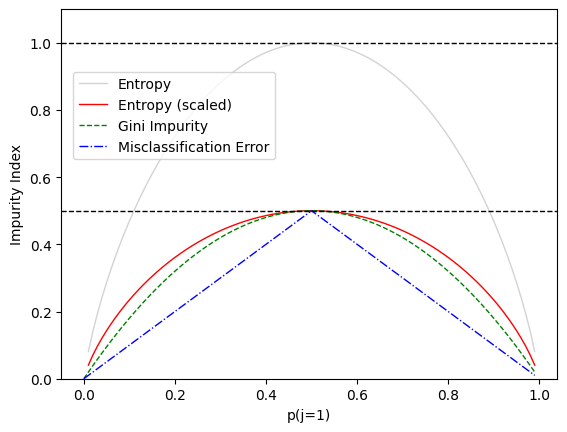

In [12]:
#Bring in requsite libraries matplotlib for plotting and numpy for scientific computing
import matplotlib.pyplot as plt
import numpy as np
# Defining Impurity Measures Functions (this is the part you need to complete)
def gini(p):
# replace "(p)" with the formula to calculate gini for a given probability p

# v***** WRITE YOUR CODE HERE *****v #
  return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
# ^***** WRITE YOUR CODE HERE *****^ #

def entropy(p):
# replace "(p)" with the formula to calculate entropy for a given probability p

# v***** WRITE YOUR CODE HERE *****v #
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
# ^***** WRITE YOUR CODE HERE *****^ #


def classification_error(p):
# replace "(p)" with the formula to calculate classification error for a given probability p

# v***** WRITE YOUR CODE HERE *****v #
   return 1 - np.max([p, 1 - p])
# ^***** WRITE YOUR CODE HERE *****^ #


# Generating Data:
# Create an array of probabilities ranging from 0 to 1 with a step size of 0.01
x = np.arange(0.0, 1.0, 0.01)

# Calculate entropy for each value of x. It returns None if p is 0 to avoid a math domain error.
ent = [entropy(p) if p != 0 else None for p in x]

# Scales the entropy values by 0.5. It returns None if the entropy value is None.
scaled_ent = [e*0.5 if e else None for e in ent]

#Calculate the misclassification error for each value of x.
c_err = [classification_error(i) for i in x]

#Plotting:

#create a figure object
fig = plt.figure()

#create a subplot
ax = plt.subplot(111)

#A loop iterates over different impurity measures and plots them:
#-It iterates over a list containing the functions for entropy, scaled entropy, Gini impurity, and misclassification error.
#-Each impurity measure is plotted against the range of probabilities x.
#-->lab contains the label for each plot.
#-->ls contains the linestyle for each plot.
#-->c contains the color for each plot.
for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

#Customization

#Add a legend to the plot:
ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

#Set the y-axis limits:
plt.ylim([0, 1.1])

#Set the labels for the x-axis and y-axis:
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')